In [1]:
import numpy as np
import pylab as plt
%matplotlib inline
import tqdm
import json
import sys
sys.path.append('../../')
from frb_periodicity.utils import get_phase

In [2]:
with open('r3_data.json', 'r') as f:
    r3_data = json.load(f)
    
burst_dict = r3_data['bursts']

In [3]:
period = 16.35
sidereal_day = 0.99727

In [4]:
dates_dict = {}
dates_dict['REST'] = np.zeros(0)
for k in burst_dict.keys():
    if 'CHIME' in k:
        dates_dict[k] = np.unique(np.round(burst_dict[k], 1))
    else:
        dates_dict['REST'] = np.concatenate((np.unique(np.round(burst_dict[k], 1)), dates_dict['REST']))

# Calculating standard deviation of non-CHIME burst phases at alias of sidereal day added to the original period


In [5]:
Ns = np.linspace(0,43,44) # harmonics
fns = Ns*(1/sidereal_day) + 1/period

In [6]:
stds = []
means = []

for f in tqdm.tqdm(fns):
    chime_p = get_phase(dates_dict['CHIME'], 1/f)
    rest_p = get_phase(dates_dict['REST'], 1/f)
    stds.append(np.std(rest_p))
    means.append(np.std(chime_p))

100%|██████████| 44/44 [00:00<00:00, 11667.05it/s]


In [7]:
Ns[np.argsort(stds)]

array([ 0.,  2., 12., 11., 17., 16., 18., 35.,  4.,  7., 23., 32.,  5.,
       28., 31., 40., 27., 43., 42., 39., 13., 41.,  8., 26., 33.,  1.,
       10., 34.,  9., 21., 37., 36., 25., 24., 22., 20.,  3., 19.,  6.,
       29., 38., 15., 14., 30.])

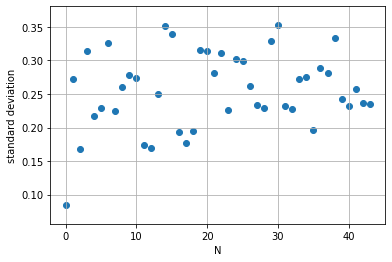

In [8]:
stds = np.array(stds)
plt.scatter(Ns, stds)
plt.ylabel('standard deviation')
plt.xlabel('N')
plt.grid()

# The lowest standard deviation is at N=0, consistent with PR3 (using just Effelsberg bursts)